In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [54]:
data_df = pd.read_csv("C:\\Users\\antot\\OneDrive\\Desktop\\Personal\\RH\\Logit Data.csv")

### EDA

In [55]:
data_df.head()

,Account Id,Account Name,Type,Product,Event Visit,Revenue,website Visits,Community User,Purchased Product E,White Paper Download
0,10001,ibm,Named,A,16,280750,14,Yes,1,Yes
1,10002,tata consultancy services,Named,B,2,2454500,5,Yes,1,Yes
2,10003,accenture,Named,C,2,2456000,2,Yes,1,Yes
3,10004,us army,Named,D,8,774250,9,Yes,1,Yes
4,10005,ey,Named,A,17,204250,17,Yes,1,Yes


In [56]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Account Id            422 non-null    int64 
 1   Account Name          422 non-null    object
 2   Type                  422 non-null    object
 3   Product               422 non-null    object
 4   Event Visit           422 non-null    int64 
 5   Revenue               422 non-null    int64 
 6   website Visits        422 non-null    int64 
 7   Community User        422 non-null    object
 8   Purchased Product E   422 non-null    int64 
 9   White Paper Download  422 non-null    object
dtypes: int64(5), object(5)
memory usage: 33.1+ KB


### Check for duplicated data

In [57]:
dups = data_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(data_df.shape)

Number of duplicate rows = 0
(422, 10)


#### There are no duplicates

In [19]:
### Getting unique count for all the objects

In [58]:
for feature in data_df.columns: 
    if data_df[feature].dtype == 'object': 
        print(feature)
        print(data_df[feature].value_counts())
        print('\n')

Account Name
bradesco                 1
american red cross       1
ninguna                  1
rabobank                 1
penn state university    1
                        ..
kpmg                     1
continental              1
southwest airlines       1
thomson reuters          1
astrazeneca              1
Name: Account Name, Length: 422, dtype: int64


Type
Non Named    222
Named        200
Name: Type, dtype: int64


Product
D    111
C    108
B    103
A    100
Name: Product, dtype: int64


Community User
Yes    238
No     184
Name: Community User, dtype: int64


White Paper Download
Yes    294
No     128
Name: White Paper Download, dtype: int64




### Checking for outliers

<AxesSubplot:>

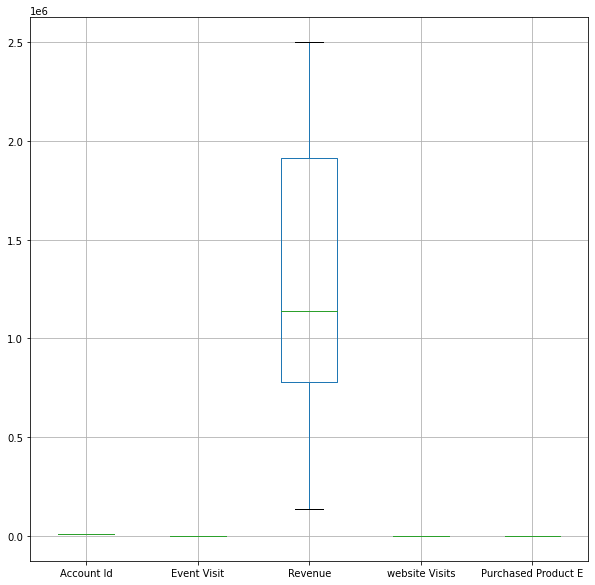

In [59]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
data_df.boxplot()

#### There are no outliers

### Checking for correlations

In [60]:
data_df1 =  data_df.drop(['Account Id'],axis =1)

<AxesSubplot:>

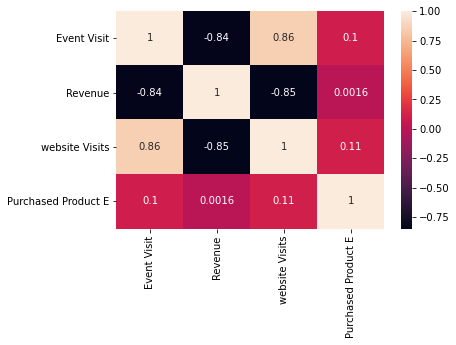

In [61]:
sns.heatmap(data_df1.corr(), annot=True)

In [62]:
# creating one hot encoder object by default 
# entire data passed is one hot encoded 
data_df = pd.get_dummies(data_df, columns = ['Type','Product','Community User','White Paper Download'])

In [63]:
data_df.head()

,Account Id,Account Name,Event Visit,Revenue,website Visits,Purchased Product E,Type_Named,Type_Non Named,Product_A,Product_B,Product_C,Product_D,Community User_No,Community User_Yes,White Paper Download_No,White Paper Download_Yes
0,10001,ibm,16,280750,14,1,1,0,1,0,0,0,0,1,0,1
1,10002,tata consultancy services,2,2454500,5,1,1,0,0,1,0,0,0,1,0,1
2,10003,accenture,2,2456000,2,1,1,0,0,0,1,0,0,1,0,1
3,10004,us army,8,774250,9,1,1,0,0,0,0,1,0,1,0,1
4,10005,ey,17,204250,17,1,1,0,1,0,0,0,0,1,0,1


In [64]:
df = data_df.drop(['Account Id','Account Name'],axis = 1)

#### Train- Test Split

In [65]:
# Copy all the predictor variables into X dataframe
X = df.drop('Purchased Product E', axis=1)

# Copy target into the y dataframe. 
y = df[['Purchased Product E']]

In [66]:
# Split X and y into training and test set in 80:20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=1)

#### Logistic Regression Model

In [67]:
# Fit the model on original data - Logistic Regression
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
model_score_train_LR = model_LR.score(X_train, y_train)

y_predict_train = model_LR.predict(X_train)
model_score_train_LR = model_LR.score(X_train, y_train)
print('Train: %.3f' % model_score_train_LR)
print(metrics.confusion_matrix(y_train, y_predict_train))
print(metrics.classification_report(y_train, y_predict_train))

y_predict_test = model_LR.predict(X_test)
model_score_test_LR = model_LR.score(X_test, y_test)
print('Test: %.3f' % model_score_test_LR)
print(metrics.confusion_matrix(y_test, y_predict_test))
print(metrics.classification_report(y_test, y_predict_test))

Train: 0.513
[[173   0]
 [164   0]]
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       173
           1       0.00      0.00      0.00       164

    accuracy                           0.51       337
   macro avg       0.26      0.50      0.34       337
weighted avg       0.26      0.51      0.35       337

Test: 0.576
[[49  0]
 [36  0]]
              precision    recall  f1-score   support

           0       0.58      1.00      0.73        49
           1       0.00      0.00      0.00        36

    accuracy                           0.58        85
   macro avg       0.29      0.50      0.37        85
weighted avg       0.33      0.58      0.42        85



C:\Users\antot\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\antot\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\antot\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Scaling the variable

In [48]:
## Scaling the age variable
num1 = ['Event Visit','Revenue','website Visits']
X[num1] = X[num1].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [49]:
# Split X and y into training and test set in 80:20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=1)

In [52]:
# Fit the model on original data - Logistic Regression
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
model_score_train_LR = model_LR.score(X_train, y_train)

y_predict_train = model_LR.predict(X_train)
model_score_train_LR = model_LR.score(X_train, y_train)
print('Train: %.3f' % model_score_train_LR)
print(metrics.confusion_matrix(y_train, y_predict_train))
print(metrics.classification_report(y_train, y_predict_train))

y_predict_test = model_LR.predict(X_test)
model_score_test_LR = model_LR.score(X_test, y_test)
print('Test: %.3f' % model_score_test_LR)
print(metrics.confusion_matrix(y_test, y_predict_test))
print(metrics.classification_report(y_test, y_predict_test))

Train: 1.000
[[173   0]
 [  0 164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       164

    accuracy                           1.00       337
   macro avg       1.00      1.00      1.00       337
weighted avg       1.00      1.00      1.00       337

Test: 1.000
[[49  0]
 [ 0 36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        36

    accuracy                           1.00        85
   macro avg       1.00      1.00      1.00        85
weighted avg       1.00      1.00      1.00        85



C:\Users\antot\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Random Forest Model

In [68]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
# Finding best parameter
from sklearn.model_selection import GridSearchCV

In [69]:
param_grid = {
    'max_depth': [7,10],
    'max_features':[4,6],
    'min_samples_leaf':[50,100],
    'n_estimators':[301,501]
}

In [70]:
rfcl = RandomForestClassifier()

In [71]:
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid , cv=3)

In [72]:
grid_search.fit(X_train, y_train)

C:\Users\antot\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\antot\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\antot\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\antot\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

C:\Users\antot\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\antot\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\antot\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\antot\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

KeyboardInterrupt: 